In [222]:
# import packages
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Standardize DataFrame

Creating a standardized DataFrame for temporary use. We will use this df for analyzing feature importance, but not for training the model later.

In [226]:
df = pd.read_csv('encoded_sleep_health.csv')
df.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,0,126,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,28,6.2,6,60,8,75,10000,0,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,28,6.2,6,60,8,75,10000,0,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,28,5.9,4,30,8,85,3000,1,140,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,28,5.9,4,30,8,85,3000,1,140,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [228]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic BP', 'Diastolic BP', 'Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Normal', 'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')

In [230]:
# Select numerical columns
numerical_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                     'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify the changes
df[numerical_columns].describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
count,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,-4.559633e-16,1.348891e-15,2.469801e-16,-3.324732e-17,1.994839e-16,-1.377389e-15,-9.499234e-17,-9.119265e-16,-8.359326e-16
std,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,-1.753096e+00,-1.676439e+00,-2.771424e+00,-1.402260e+00,-1.345836e+00,-1.250750e+00,-2.362273e+00,-1.751604e+00,-1.568203e+00
25%,-8.006081e-01,-9.213348e-01,-1.098280e+00,-6.812078e-01,-7.815505e-01,-5.243827e-01,-7.531140e-01,-4.592388e-01,-7.556402e-01
50%,9.415288e-02,8.547080e-02,-2.617083e-01,3.984423e-02,-2.172650e-01,-4.013793e-02,1.133560e-01,1.869437e-01,5.692287e-02
75%,9.023241e-01,8.405750e-01,5.748635e-01,7.608963e-01,9.113060e-01,4.441068e-01,7.322631e-01,8.331262e-01,8.694859e-01
max,1.941401e+00,1.721530e+00,1.411435e+00,1.481948e+00,1.475592e+00,3.833820e+00,1.970077e+00,1.737782e+00,1.682049e+00


In [232]:
df.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,0,-0.330002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,0,-0.459239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,0,-0.459239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1,1.479309,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1,1.479309,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [244]:
df.to_csv('temp_standardized_sleep_health.csv', index=False)

# Feature Engineering and Feature Selection

Using correlation analysis, mutual information, or feature importance techniques to identify the most relevant features for predicting sleep disorders.

In [248]:
df_standardized = pd.read_csv('temp_standardized_sleep_health.csv')

In [250]:
df_standardized.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,0,-0.330002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,0,-0.459239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,0,-0.459239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1,1.479309,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1,1.479309,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [252]:
df_standardized.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic BP', 'Diastolic BP', 'Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Normal', 'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')

In [254]:
activity = df_standardized['Physical Activity Level']
steps = df_standardized['Daily Steps']

correlation, p_value = pearsonr(activity, steps)
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.7727230504529303
P-value: 1.9682558194645966e-75


Physical activity levels and daily steps are highly correlated, which is to be expected. Drop the daily steps column before calculating feature importance.

In [257]:
systolic = df_standardized['Systolic BP']
diastolic = df_standardized['Diastolic BP']

correlation, p_value = pearsonr(systolic, diastolic)
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.9728849870932423
P-value: 1.24223611675017e-238


Systolic and diastolic blood pressures are also highly correlated, which is to be expected. 

Thus, combine the two using the Mean Arterial Pressure formula: `MAP = (1/3 * Systolic BP) + (2/3 * Diastolic BP)`

Dropping `Heart Rate` because heart rate fluctuates and is also highly correlative with blood pressure.

In [262]:
df_original = pd.read_csv('encoded_sleep_health.csv')

# use the original BP values to calculate MAP
df_original['Mean Arterial Pressure'] = 1/3 * df_original['Systolic BP'] + 2/3 * df_original['Diastolic BP']

# drop unnecessary columns
df_original = df_original.drop(['Systolic BP', 'Diastolic BP', 'Daily Steps', 'Heart Rate'], axis=1)

In [268]:
# re-standardize numerical data after dropping columns and adding mean arterial pressure
# select numerical columns
df_standardized = df_original.copy()
numerical_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                     'Stress Level', 'Mean Arterial Pressure']

# create StandardScaler
scaler = StandardScaler()

# fit and transform numerical columns
df_standardized[numerical_columns] = scaler.fit_transform(df_standardized[numerical_columns])

In [270]:
df_standardized.to_csv('restandardized_sleep_health.csv', index=False)
df_standardized.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Sleep Disorder,Gender_Female,Gender_Male,Occupation_Accountant,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Mean Arterial Pressure
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.293892
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.645382
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.645382
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.112065
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.112065


# ML Techniques to Analyze Feature Importance

In [276]:
# analyze feature importance using random forest
X = df_standardized.drop(['Sleep Disorder', 'Person ID'], axis=1)
y = df_standardized['Sleep Disorder']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# sort features by importance
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

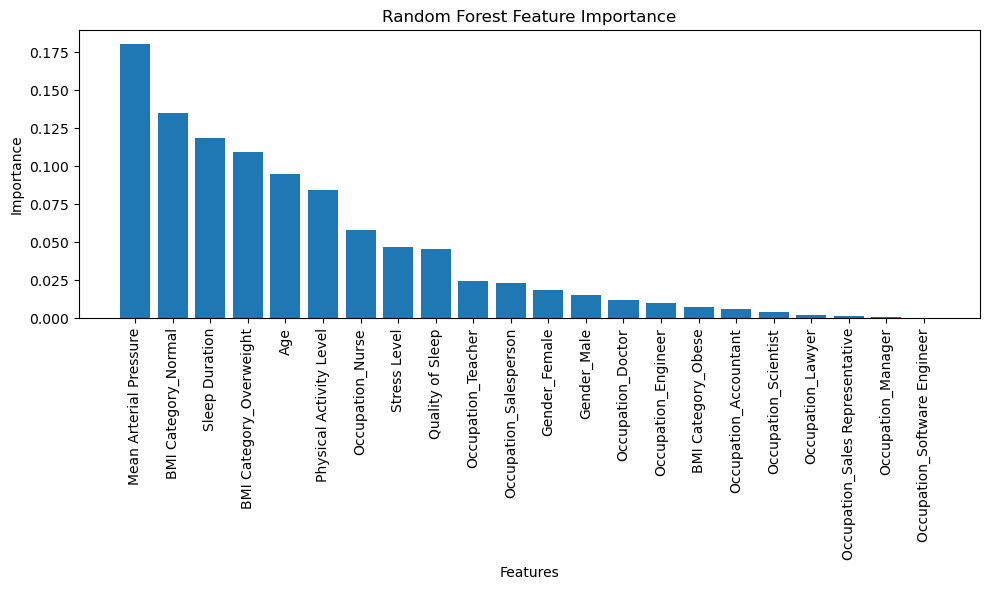

                            feature  importance
0            Mean Arterial Pressure    0.180512
1               BMI Category_Normal    0.134924
2                    Sleep Duration    0.118443
3           BMI Category_Overweight    0.109236
4                               Age    0.094744
5           Physical Activity Level    0.084373
6                  Occupation_Nurse    0.058131
7                      Stress Level    0.047032
8                  Quality of Sleep    0.045696
9                Occupation_Teacher    0.024809
10           Occupation_Salesperson    0.023097
11                    Gender_Female    0.018694
12                      Gender_Male    0.015164
13                Occupation_Doctor    0.012121
14              Occupation_Engineer    0.009863
15               BMI Category_Obese    0.007634
16            Occupation_Accountant    0.005878
17             Occupation_Scientist    0.004431
18                Occupation_Lawyer    0.002314
19  Occupation_Sales Representative    0

In [278]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Print feature importances
print(feature_importance)

Setting threshold of 0.05 importance--only features that have a calculated feature importance higher will be used in the model

Use elbow method to verify feature importance choices

In [282]:
cumulative_importance = np.cumsum(feature_importance['importance'])

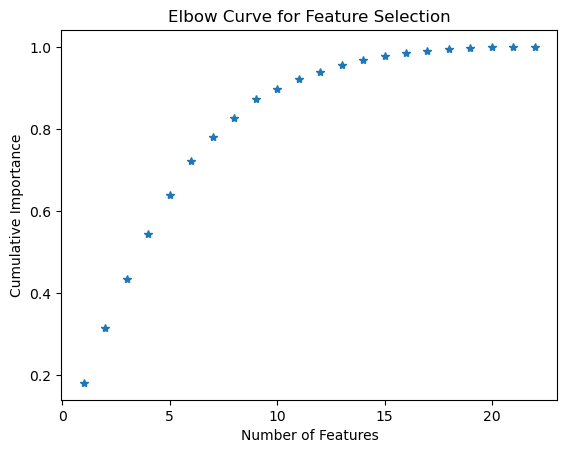

In [284]:
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, '*')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Elbow Curve for Feature Selection')
plt.show()

In [300]:
# extract top features from the feature importance df
top_features = feature_importance[feature_importance['importance'] > 0.05]
cols = top_features['feature'].to_list()

In [304]:
# extract top features from original df
binary_col = ['BMI Category_Normal', 'BMI Category_Overweight', 'Occupation_Nurse']
continuous_col = ['Mean Arterial Pressure', 'Sleep Duration', 'Age', 'Physical Activity Level']
other_col = ['Person ID', 'Sleep Disorder']

df_key_feat = df_original[binary_col + continuous_col + other_col]
df_key_feat.head()

,BMI Category_Normal,BMI Category_Overweight,Occupation_Nurse,Mean Arterial Pressure,Sleep Duration,Age,Physical Activity Level,Person ID,Sleep Disorder
0,0.0,1.0,0.0,97.333333,6.1,27,42,1,0
1,1.0,0.0,0.0,95.000000,6.2,28,60,2,0
2,1.0,0.0,0.0,95.000000,6.2,28,60,3,0
3,0.0,0.0,0.0,106.666667,5.9,28,30,4,1
4,0.0,0.0,0.0,106.666667,5.9,28,30,5,1


In [308]:
# re-standardize for modeling and deployment
# create StandardScaler 
scaler = StandardScaler()

# fit and transform numerical columns
df_key_feat[continuous_col] = scaler.fit_transform(df_key_feat[continuous_col])

/var/folders/q2/gdry13p13_g_7vlmhrdwncm40000gn/T/ipykernel_17888/3233541500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_feat[continuous_col] = scaler.fit_transform(df_key_feat[continuous_col])


In [312]:
# ensure scaler worked
scaler.scale_

array([ 6.63841858,  0.79459231,  8.66153061, 20.80293635])

In [318]:
df_key_feat.to_csv('key_features_sleep_health.csv', index=False)
df_key_feat.head()

,BMI Category_Normal,BMI Category_Overweight,Occupation_Nurse,Mean Arterial Pressure,Sleep Duration,Age,Physical Activity Level,Person ID,Sleep Disorder
0,0.0,1.0,0.0,-0.293892,-1.298887,-1.753096,-0.825418,1,0
1,1.0,0.0,0.0,-0.645382,-1.173036,-1.637643,0.039844,2,0
2,1.0,0.0,0.0,-0.645382,-1.173036,-1.637643,0.039844,3,0
3,0.0,0.0,0.0,1.112065,-1.550588,-1.637643,-1.402260,4,1
4,0.0,0.0,0.0,1.112065,-1.550588,-1.637643,-1.402260,5,1


In [320]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']